In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing


In [2]:
california_house = fetch_california_housing()

In [4]:
x_train_all, x_test, y_train_all, y_test = train_test_split(california_house.data, california_house.target)

In [6]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train_all, y_train_all)

In [7]:
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [8]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)

In [16]:
model = keras.models.Sequential([
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1)
])

In [17]:
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['mean_absolute_error'])

In [18]:
run_model = model.fit(x_train, y_train, epochs=40, validation_data=(x_valid, y_valid))

Epoch 1/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 1.4544 - mean_absolute_error: 0.8339 - val_loss: 0.5983 - val_mean_absolute_error: 0.5650
Epoch 2/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5725 - mean_absolute_error: 0.5488 - val_loss: 0.4937 - val_mean_absolute_error: 0.5263
Epoch 3/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4532 - mean_absolute_error: 0.4912 - val_loss: 0.4895 - val_mean_absolute_error: 0.4979
Epoch 4/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4339 - mean_absolute_error: 0.4742 - val_loss: 0.4349 - val_mean_absolute_error: 0.4809
Epoch 5/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3890 - mean_absolute_error: 0.4520 - val_loss: 0.4258 - val_mean_absolute_error: 0.4793
Epoch 6/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3725 - mean_absolute_error: 0.4450 - val_loss: 0.4149 - val_mean_absolute_error: 0.4651
Epoch 7/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3777 - mean_absolute_error: 0.4426 - v

In [20]:
run_model.history

{'loss': [1.0579184293746948,
  0.5251191258430481,
  0.4473610520362854,
  0.4161071479320526,
  0.3922172486782074,
  0.38073697686195374,
  0.37021538615226746,
  0.3623160719871521,
  0.35607385635375977,
  0.3511483371257782,
  0.3468310832977295,
  0.3431306779384613,
  0.34008723497390747,
  0.33763718605041504,
  0.3345610499382019,
  0.3309793770313263,
  0.32825374603271484,
  0.3280356228351593,
  0.3242221772670746,
  0.32174980640411377,
  0.3186395764350891,
  0.3172670006752014,
  0.31487837433815,
  0.3133338689804077,
  0.3123011887073517,
  0.31076911091804504,
  0.3086530566215515,
  0.30574437975883484,
  0.3056453466415405,
  0.3038863241672516,
  0.30201536417007446,
  0.3013457655906677,
  0.30047863721847534,
  0.2982081174850464,
  0.29750874638557434,
  0.2958945035934448,
  0.29586803913116455,
  0.2947140336036682,
  0.2930211126804352,
  0.29317790269851685],
 'mean_absolute_error': [0.6892843246459961,
  0.5226970314979553,
  0.48517054319381714,
  0.46496

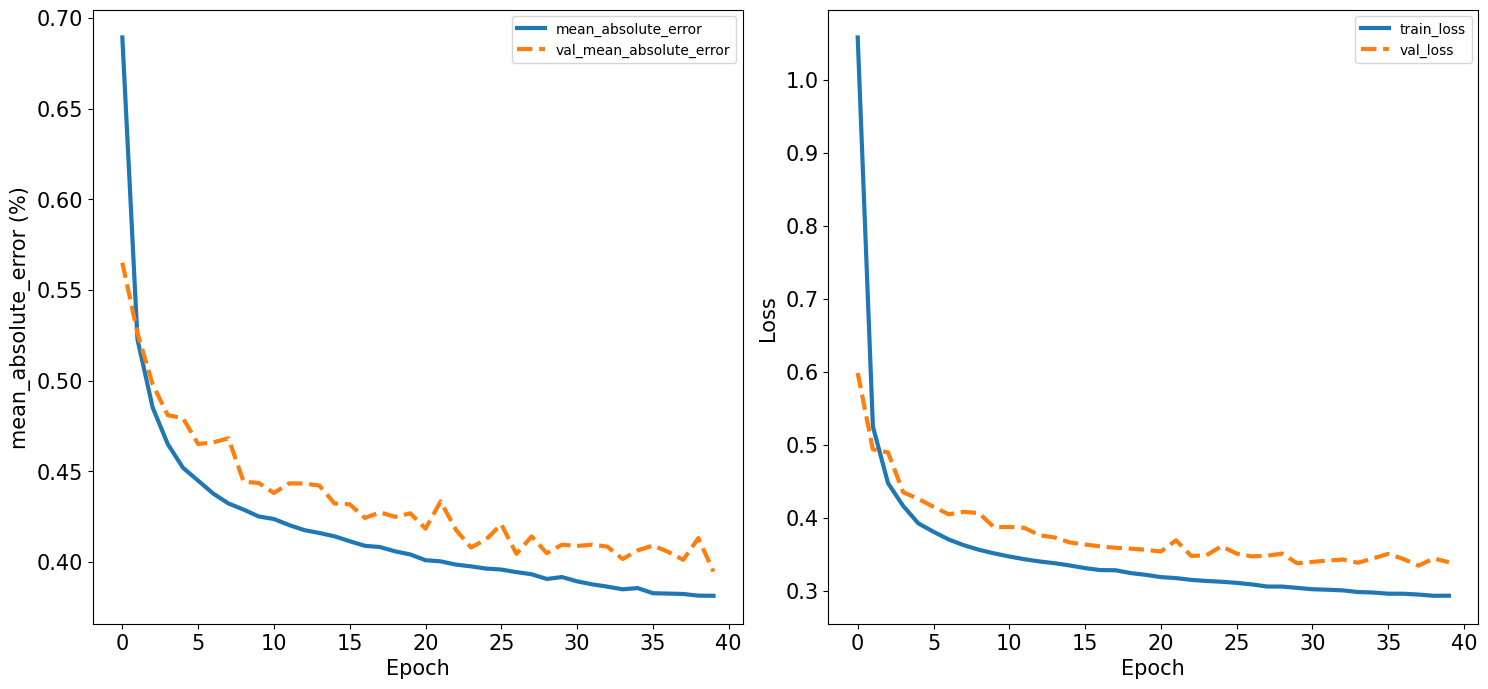

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))  # Adjust figsize as needed
ax1.plot(run_model.history["mean_absolute_error"], label="mean_absolute_error", lw = 3, linestyle ='-')
ax1.plot(run_model.history["val_mean_absolute_error"], label="val_mean_absolute_error", lw = 3, linestyle ='--')
ax1.set_ylabel('mean_absolute_error (%)', fontsize=15)
ax1.set_xlabel('Epoch', fontsize=15)
ax1.legend()
ax1.tick_params(axis='both', which='major', labelsize=15)
ax2.plot(run_model.history["loss"], label="train_loss", lw = 3, linestyle ='-')
ax2.plot(run_model.history["val_loss"], label="val_loss", lw = 3, linestyle ='--')
ax2.set_ylabel('Loss ', fontsize=15)
ax2.set_xlabel('Epoch', fontsize=15)
ax2.legend()
ax2.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()
